In [70]:
import pandas as pd

# 엑셀 파일 읽어오기
data = pd.read_csv("nightlife_crime.csv", encoding='cp949')

data

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,murder_adult,robbery_adult,forcible_rape_adult,thef_adult,violence_adult
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604,3,15,291,2344,2428
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712,4,3,150,2173,2554
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649,7,14,144,1268,2439
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207,7,10,253,1823,2967
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298,9,10,306,2536,3089
5,광진,19,91,110,0,0,29,155,153,4,14,240,3026,2625,4,14,211,2871,2472
6,구로,38,110,148,0,1,3,157,194,8,15,281,2335,3007,8,14,278,2178,2813
7,금천,60,82,142,0,0,7,146,66,3,6,151,1567,2054,3,6,144,1421,1988
8,노원,30,57,87,0,6,14,227,337,10,7,197,2193,2723,10,1,183,1966,2386
9,도봉,21,55,76,0,6,21,126,107,3,9,102,1063,1487,3,3,81,937,1380


In [71]:
#  각종 시각화에 필요한 라이브러리 import
import matplotlib
from matplotlib import font_manager,rc

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [72]:
# 전체를 뺀 데이터
data_copy = data.loc[0:24, :]

In [73]:
#데이터 분리 - 청소년
data_kid=data.iloc[:, 0:9]

In [74]:
#데이터 분리 - 전체
data_total=data.iloc[:,[0,1,2,3,9,10,11,12,13]]

In [75]:
#데이터 분리 - 성인
data_adult=data.iloc[:,[0,1,2,3,14,15,16,17,18]]

In [76]:
#지역별 성인 범죄율 내림차순 정렬
data_adult['total_crime_adult']=data_adult['murder_adult']+data_adult['robbery_adult']+data_adult['forcible_rape_adult']+data_adult['thef_adult']+data_adult['violence_adult']
data_adult['ratio_adult']=(data_adult['total_crime_adult']/106751)*100
data_adultTotal=data_adult.loc[:, ('region','total_crime_adult','ratio_adult')]
data_adultTotal.sort_values(by='ratio_adult')

,region,total_crime_adult,ratio_adult
14,서초,1972,1.847289
16,성북,2063,1.932535
22,종로,2374,2.223867
9,도봉,2404,2.251970
21,은평,2432,2.278199
15,성동,3169,2.968590
7,금천,3562,3.336737
20,용산,3686,3.452895
10,동대문,3865,3.620575
2,강북,3872,3.627132


In [77]:
#지역별 청소년 범죄율 내림차순 정렬
data_kid['total_crime_kid']=data_kid['murder']+data_kid['robbery']+data_kid['forcible_rape']+data_kid['thef']+data_kid['violence']
data_kid['ratio_kid']=(data_kid['total_crime_kid']/7154)*100
data_kidTotal=data_kid.loc[:, ('region','total_crime_kid','ratio_kid')]
data_kidTotal.sort_values(by='ratio_kid')

,region,total_crime_kid,ratio_kid
22,종로,98,1.369863
14,서초,113,1.579536
20,용산,134,1.873078
23,중구,158,2.208555
16,성북,174,2.432206
11,동작,182,2.544031
15,성동,189,2.641879
10,동대문,209,2.921443
7,금천,219,3.061224
21,은평,228,3.187028


In [78]:
data_copy['total_crime_kid'] = data_kid['murder']+data_kid['robbery']+data_kid['forcible_rape']+data_kid['thef']+data_kid['violence']

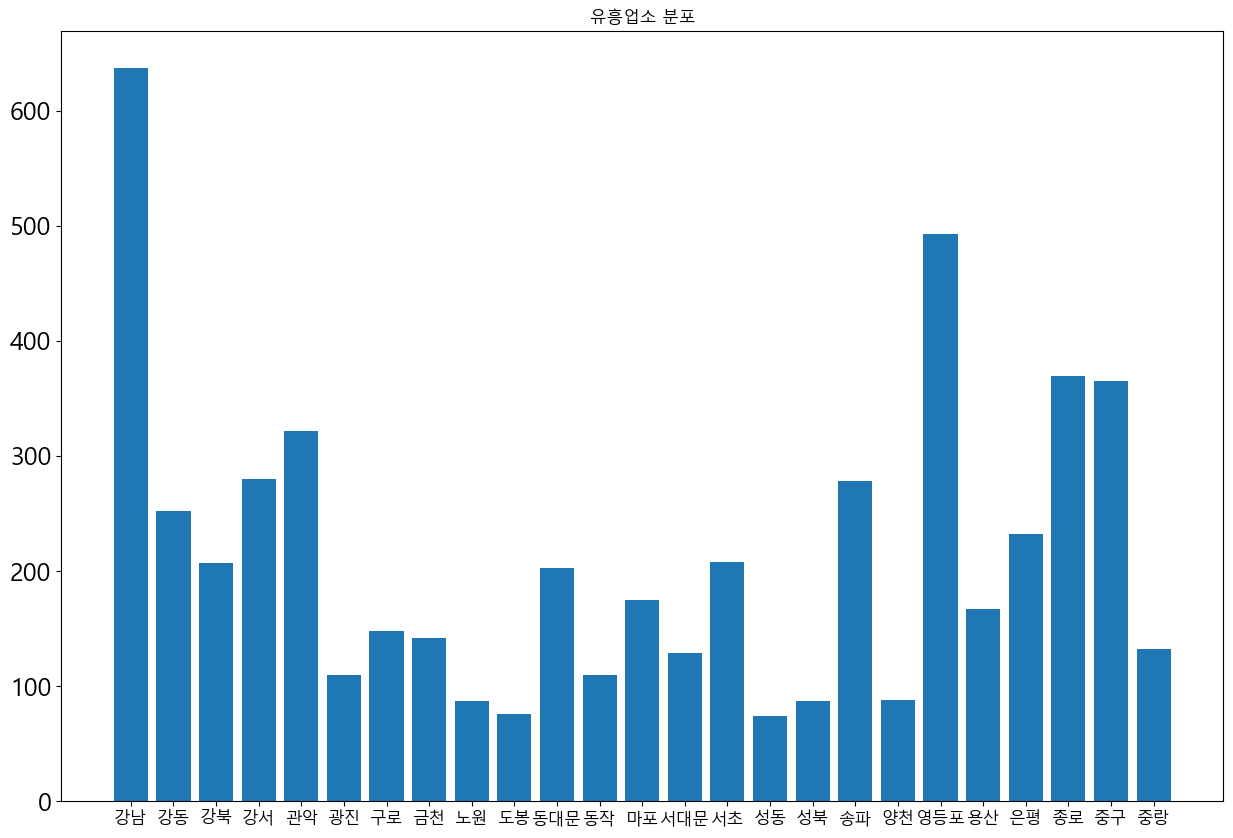

In [79]:
plt.figure(figsize =(15, 10))
plt.rc('xtick', labelsize=12)
plt.yticks(fontsize=18)
plt.title(" 유흥업소 분포 ")
plt.bar( data_copy["region"], data_copy["tot_nightlife"])
plt.show()

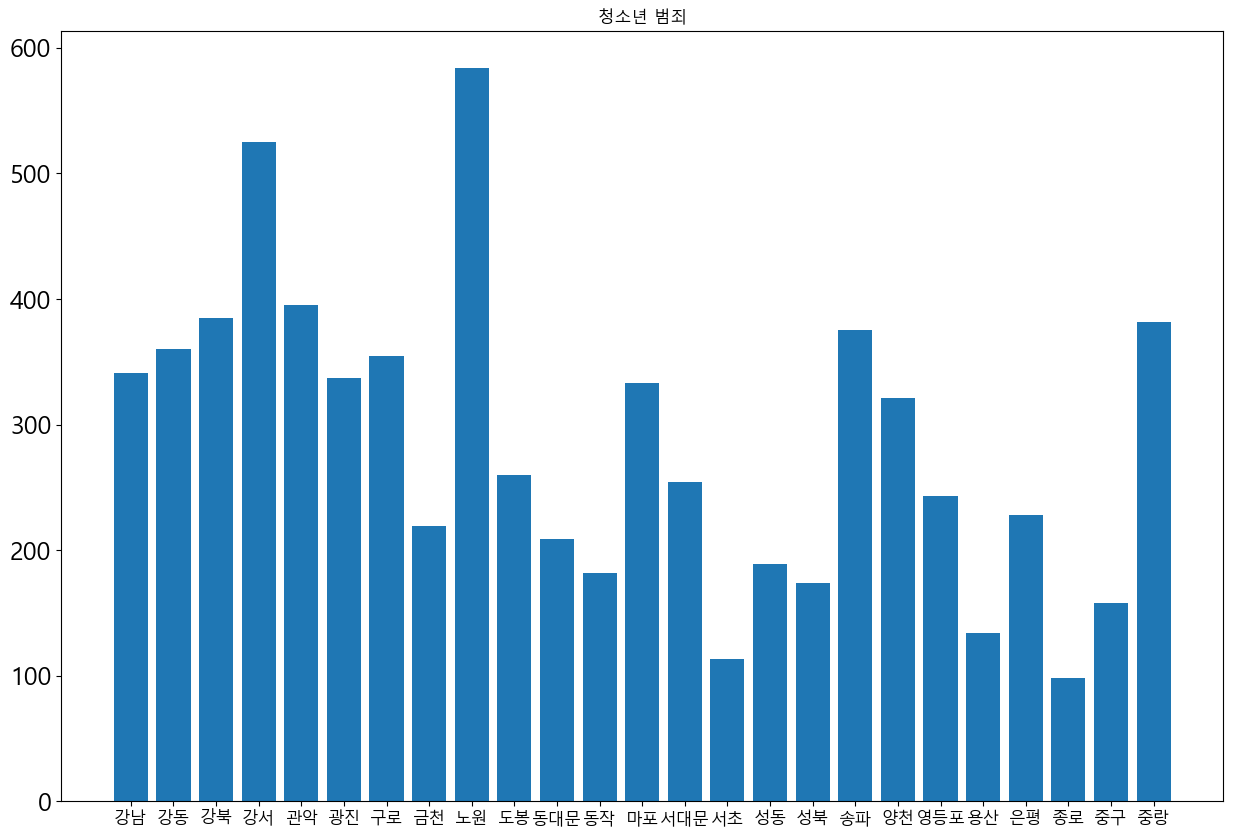

In [80]:
plt.figure(figsize =(15, 10))
plt.rc('xtick', labelsize=12)
plt.yticks(fontsize=18)
plt.title("청소년 범죄")
plt.bar( data_copy["region"], data_copy["total_crime_kid"])
plt.show()

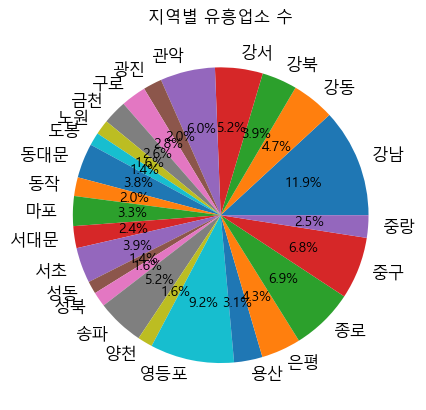

In [81]:
# 지역별 유흥업소 수 - 파이차트
nightlife=data['tot_nightlife'].iloc[0:25]
labels=data['region'].iloc[0:25]
plt.pie(nightlife, labels=labels, autopct='%.1f%%')
plt.title('지역별 유흥업소 수')
plt.show()

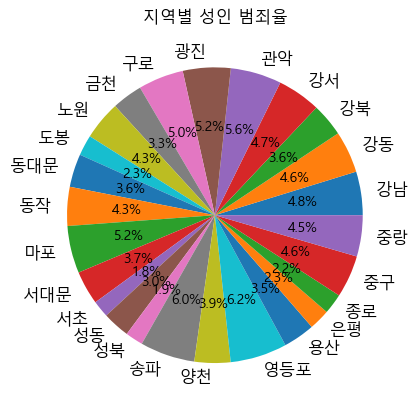

In [82]:
#지역별 성인의 범죄율 시각화 - 파이차트
ratio=data_adult['ratio_adult'].iloc[0:25]
labels=data_adult['region'].iloc[0:25]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('지역별 성인 범죄율')
plt.show()

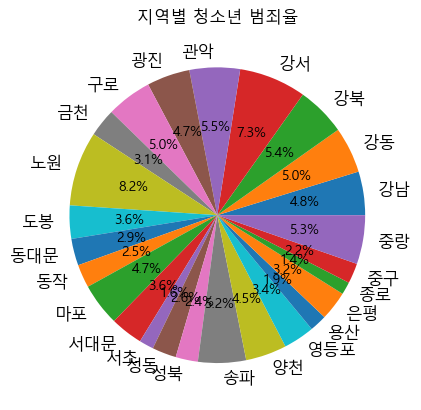

In [83]:
#지역별 청소년의 범죄율 시각화 - 파이차트
#지역별 성인의 범죄율 시각화
ratio=data_kid['ratio_kid'].iloc[0:25]
labels=data_kid['region'].iloc[0:25]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('지역별 청소년 범죄율')
plt.show()

In [84]:
#1. 성인 범죄율과 청소년 범죄율 데이터 프레임 병합
data_result1 = pd.merge(data_adultTotal, data_kidTotal, on="region")
data_result1

,region,total_crime_adult,ratio_adult,total_crime_kid,ratio_kid
0,강남,5081,4.759674,341,4.766564
1,강동,4884,4.575133,360,5.032150
2,강북,3872,3.627132,385,5.381605
3,강서,5060,4.740002,525,7.338552
4,관악,5950,5.573718,395,5.521387
5,광진,5572,5.219623,337,4.710651
6,구로,5291,4.956394,355,4.962259
7,금천,3562,3.336737,219,3.061224
8,노원,4546,4.258508,584,8.163265
9,도봉,2404,2.251970,260,3.634330


In [85]:
#2. 지역별 성인 범죄율과 청소년 범죄율의 피어슨 상관계수(비율에 대한 상관계수)
correlation1=data_result1['ratio_adult'].corr(data_result1['ratio_kid'])
print("지역별 성인 범죄율과 청소년 범죄율의 피어슨 상관계수: ", correlation1)

지역별 성인 범죄율과 청소년 범죄율의 피어슨 상관계수:  0.9971424807366093


In [86]:
#2. 지역별 성인 범죄율과 청소년 범죄율의 피어슨 상관계수(도수에 대한 상관계수)
correlation2=data_result2['total_crime_adult'].corr(data_result2['total_crime_kid'])
print("지역별 성인 범죄수과 청소년 범죄수의 피어슨 상관계수: ", correlation2)

지역별 성인 범죄수과 청소년 범죄수의 피어슨 상관계수:  0.9971424807366092


In [87]:
# 단순선형회귀분석
# 성인 범죄 -> 청소년 범죄 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#종속변수: total_crime_kid, #설명변수: total_crime_adult
model.fit(data_result2[ ["total_crime_adult"] ], data_result2[ ["total_crime_kid"]])

print("회귀계수 : " , end = '')
print(model.coef_) #회귀계수

print("절편 : " , end = '')
print(model.intercept_) #절편

print("결정계수 : " , end = '')
print(model.score(data_result2[ ["total_crime_adult"] ], data_result2[ ["total_crime_kid"] ] )) #결정계수

회귀계수 : [[0.06694623]]
절편 : [0.57100245]
결정계수 : 0.994293126889559


▶ 성인 범죄랑 청소년 범죄 상관관계

In [88]:
data_result2_copy = data_result2.loc[0:24, :]

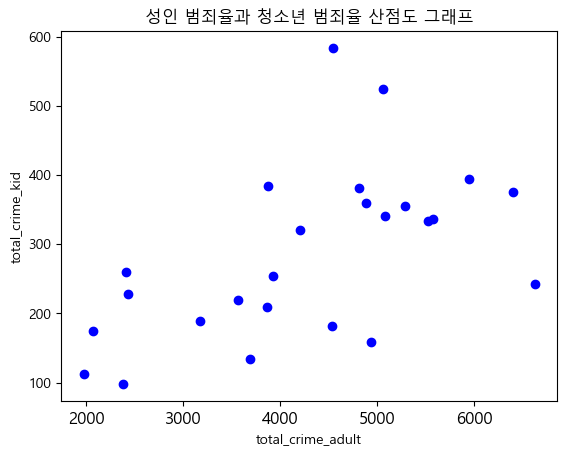

In [89]:
#산점도 그래프
plt.plot(data_result2_copy["total_crime_adult"], data_result2_copy["total_crime_kid"], 'bo')
plt.xlabel('total_crime_adult')
plt.ylabel('total_crime_kid')
plt.title('성인 범죄율과 청소년 범죄율 산점도 그래프')
plt.show()

                     df         sum_sq        mean_sq          F    PR(>F)
total_crime_adult   1.0  109581.773209  109581.773209  10.109036  0.004179
Residual           23.0  249319.586791   10839.982034        NaN       NaN

 p_value값이 1.928579e-28 < 0.05 이므로 대립가설을 채택합니다.


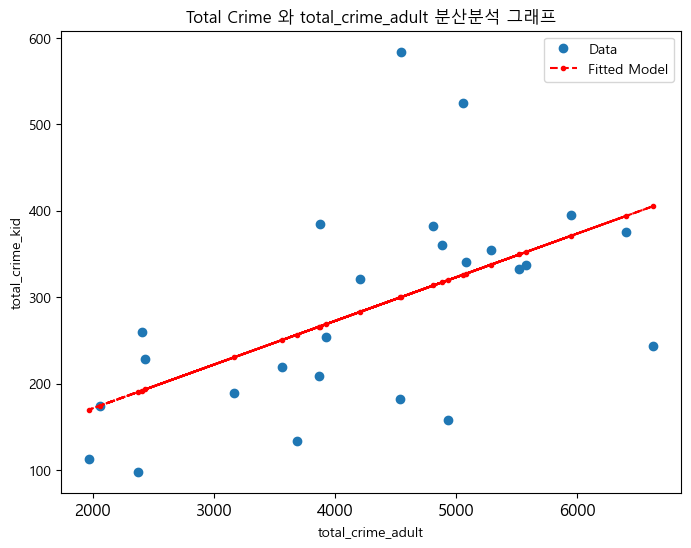

In [90]:
#일원분산분석 모델 생성
model = ols('total_crime_kid ~ total_crime_adult', data=data_result2_copy).fit()

#분산분석 결과 요약
anova_result = sm.stats.anova_lm(model)
print(anova_result)
print("\n p_value값이 1.928579e-28 < 0.05 이므로 대립가설을 채택합니다.")

#분산분석 결과에 대한 그래프 생성
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_result2_copy['total_crime_adult'], data_result2_copy['total_crime_kid'], 'o', label='Data')
ax.plot(data_result2_copy['total_crime_adult'], model.fittedvalues, 'r--.', label='Fitted Model')
ax.legend()
ax.set_xlabel('total_crime_adult')
ax.set_ylabel('total_crime_kid')
ax.set_title('Total Crime 와 total_crime_adult 분산분석 그래프')
plt.show()

< 상관이 없는 변수들 모음 >

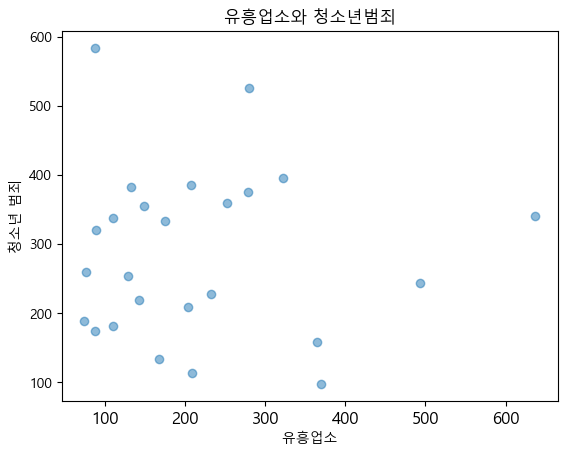

유흥 업소와 청소년 범죄의 상관계수 : -0.014560


PearsonRResult(statistic=-0.014560068038693454, pvalue=0.9449286007686696)

In [91]:
X = data_copy.tot_nightlife.values
Y = data_copy.total_crime_kid.values

plt.scatter(X, Y, alpha = 0.5)
plt.title(' 유흥업소와 청소년범죄 ')
plt.xlabel(' 유흥업소 ')
plt.ylabel(' 청소년 범죄 ')
plt.show()

print("유흥 업소와 청소년 범죄의 상관계수 : %f" % np.corrcoef(X, Y)[0, 1])

stats.pearsonr(X, Y)

                 df         sum_sq       mean_sq         F    PR(>F)
tot_nightlife   1.0      76.085502     76.085502  0.004877  0.944929
Residual       23.0  358825.274498  15601.098891       NaN       NaN

 p_value값이 > 0.05 이므로 귀무가설을 채택합니다.


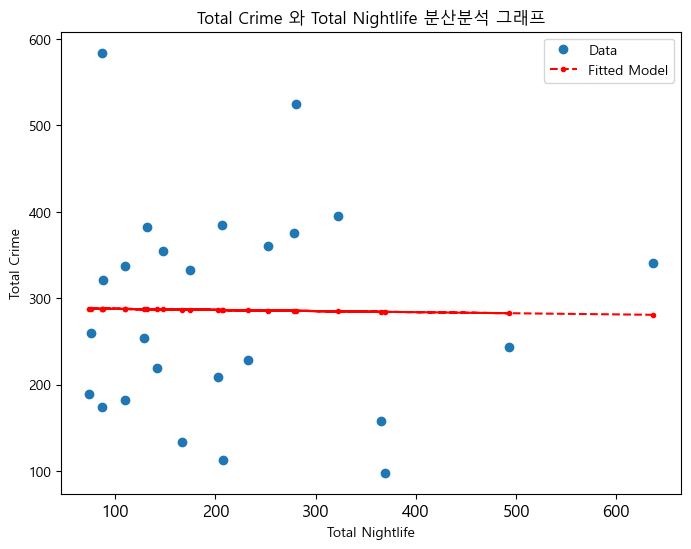

In [92]:
# 청소년이 유해업소 등 직접적인 유해환경에 노출된 경우 충동적으로 범죄를 일으킬 수 있지 않을까 ? (가설 수립)
# 귀무가설: 지역별 유흥업소의 수와 청소년 범죄와는 상관 관계가 없다.
# 대립가설: 지역별 유흥업소의 수와 청소년 범죄와는 상관 관계가 있다.
#일원분산분석
#일원분산분석 모델 생성
model = ols('total_crime_kid ~ tot_nightlife', data=data_copy).fit()

#분산분석 결과 요약
anova_result = sm.stats.anova_lm(model)
print(anova_result)
print("\n p_value값이 > 0.05 이므로 귀무가설을 채택합니다.")

#분산분석 결과에 대한 그래프 생성
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_copy['tot_nightlife'], data_copy['total_crime_kid'], 'o', label='Data')
ax.plot(data_copy['tot_nightlife'], model.fittedvalues, 'r--.', label='Fitted Model')
ax.legend()
ax.set_xlabel('Total Nightlife')
ax.set_ylabel('Total Crime')
ax.set_title('Total Crime 와 Total Nightlife 분산분석 그래프')
plt.show()

In [93]:
# 중범죄, 경범죄 추가
data_copy["strong_crime_kid"] = data_copy['murder']+data_copy['robbery']+data_copy['forcible_rape']
data_copy["weak_crime_kid"] = data_copy['thef']+data_copy['violence']

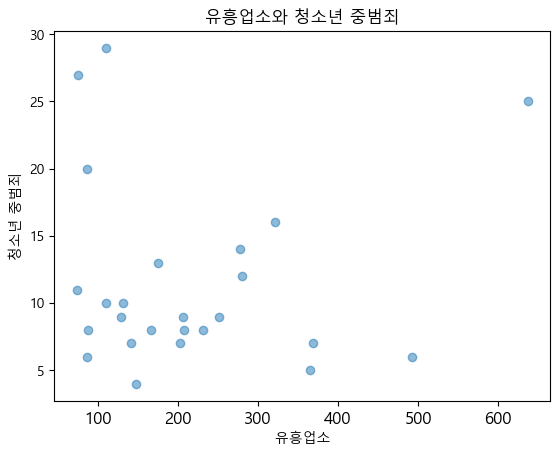

유흥 업소와 청소년 중범죄의 상관계수 : 0.030461


PearsonRResult(statistic=0.030461410555926993, pvalue=0.8850719896249815)

In [94]:
X = data_copy.tot_nightlife.values
Y = data_copy.strong_crime_kid.values

plt.scatter(X, Y, alpha = 0.5)
plt.title(' 유흥업소와 청소년 중범죄 ')
plt.xlabel(' 유흥업소 ')
plt.ylabel(' 청소년 중범죄 ')
plt.show()

print("유흥 업소와 청소년 중범죄의 상관계수 : %f" % np.corrcoef(X, Y)[0, 1])

stats.pearsonr(X, Y)

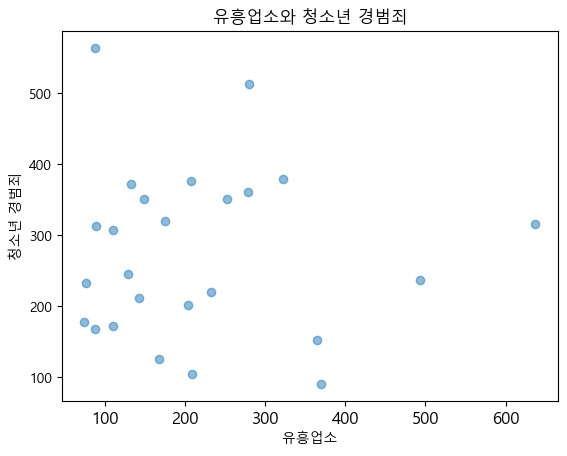

유흥 업소와 청소년 경범죄의 상관계수 : -0.016624


PearsonRResult(statistic=-0.016623691037481417, pvalue=0.9371373910302607)

In [95]:
X = data_copy.tot_nightlife.values
Y = data_copy.weak_crime_kid.values

plt.scatter(X, Y, alpha = 0.5)
plt.title(' 유흥업소와 청소년 경범죄 ')
plt.xlabel(' 유흥업소 ')
plt.ylabel(' 청소년 경범죄 ')
plt.show()

print("유흥 업소와 청소년 경범죄의 상관계수 : %f" % np.corrcoef(X, Y)[0, 1])

stats.pearsonr(X, Y)

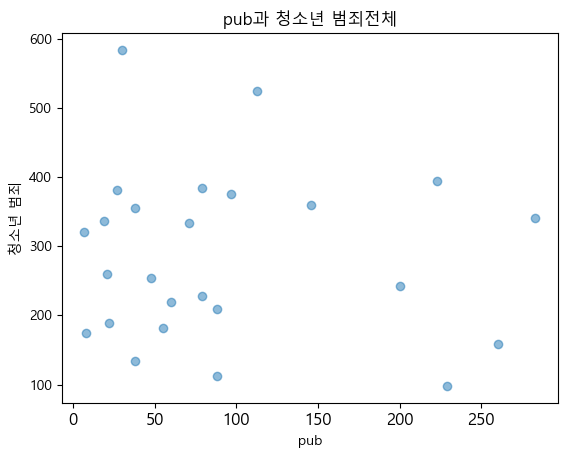

pub과 청소년 범죄의 상관계수 : -0.081028


PearsonRResult(statistic=-0.08102825209720238, pvalue=0.7002124543622694)

In [96]:
X = data_copy.pub.values
Y = data_copy.total_crime_kid.values

plt.scatter(X, Y, alpha = 0.5)
plt.title(' pub과 청소년 범죄전체 ')
plt.xlabel(' pub ')
plt.ylabel(' 청소년 범죄 ')
plt.show()

print("pub과 청소년 범죄의 상관계수 : %f" % np.corrcoef(X, Y)[0, 1])

stats.pearsonr(X, Y)

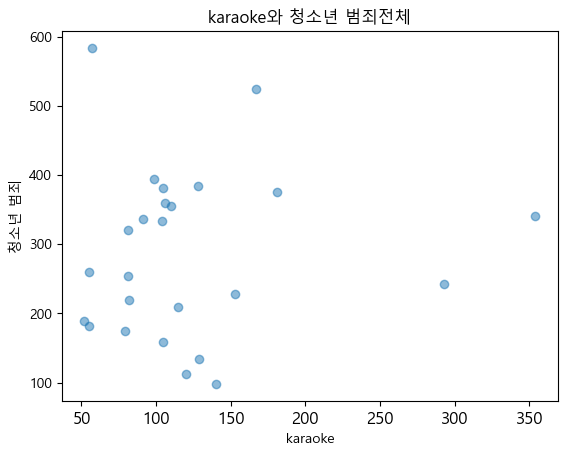

karaoke와 청소년 범죄의 상관계수 : 0.066892


PearsonRResult(statistic=0.06689248163632242, pvalue=0.7507161535974126)

In [97]:
X = data_copy.karaoke.values
Y = data_copy.total_crime_kid.values

plt.scatter(X, Y, alpha = 0.5)
plt.title(' karaoke와 청소년 범죄전체 ')
plt.xlabel(' karaoke ')
plt.ylabel(' 청소년 범죄 ')
plt.show()

print("karaoke와 청소년 범죄의 상관계수 : %f" % np.corrcoef(X, Y)[0, 1])

stats.pearsonr(X, Y)

# < 결론 >

외부 요인이 청소년 범죄율에 영향을 미치는가?

성인 범죄율만이 청소년 범죄율에 양의 선형관계를 그리는 것이 확인 되고,
나머지 변수들은 청소년 범죄율과 상관관계가 없다고 생각합니다.